### SVM Kernels Indepth Intuition And Practical Explanation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)


In [20]:
y

array([8.66025404, 8.71779204, 8.77378994, 8.82827705, 8.88128118,
       8.93282873, 8.98294476, 9.03165312, 9.07897646, 9.12493632,
       9.16955321, 9.21284664, 9.25483518, 9.29553652, 9.3349675 ,
       9.37314414, 9.41008171, 9.44579475, 9.4802971 , 9.51360192,
       9.54572176, 9.57666854, 9.60645359, 9.63508769, 9.66258107,
       9.68894344, 9.714184  , 9.73831149, 9.76133416, 9.7832598 ,
       9.80409577, 9.82384901, 9.84252604, 9.86013297, 9.87667553,
       9.89215905, 9.90658851, 9.91996849, 9.93230325, 9.94359667,
       9.9538523 , 9.96307334, 9.97126266, 9.9784228 , 9.98455598,
       9.98966408, 9.99374868, 9.99681104, 9.99885209, 9.99987246,
       9.99987246, 9.99885209, 9.99681104, 9.99374868, 9.98966408,
       9.98455598, 9.9784228 , 9.97126266, 9.96307334, 9.9538523 ,
       9.94359667, 9.93230325, 9.91996849, 9.90658851, 9.89215905,
       9.87667553, 9.86013297, 9.84252604, 9.82384901, 9.80409577,
       9.7832598 , 9.76133416, 9.73831149, 9.714184  , 9.68894

In [21]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [22]:
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [23]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [24]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [25]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

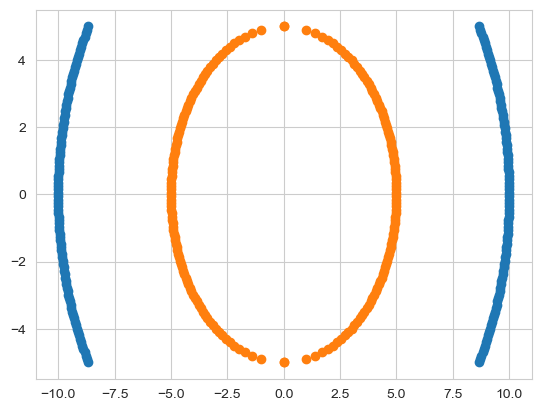

In [26]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [37]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [40]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [41]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [44]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [46]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [47]:
y_train

250    1
63     0
312    1
159    0
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

### Polynomial Kernel
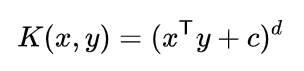

In [48]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [59]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [60]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
													random_state = 42)

In [67]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
247,4.993619,-0.252525,24.936231,0.063769,-1.261015
110,-9.169553,3.989899,84.080706,15.919294,-36.585591
16,9.410082,-3.383838,88.549638,11.450362,-31.842196
66,9.860133,1.666667,97.222222,2.777778,16.433555
153,-9.993749,-0.353535,99.875013,0.124987,3.533143
...,...,...,...,...,...
71,9.761334,2.171717,95.283645,4.716355,21.198857
106,-8.982945,4.393939,80.693297,19.306703,-39.470515
270,4.551063,2.070707,20.712172,4.287828,9.423918
348,-4.997704,0.151515,24.977043,0.022957,-0.757228


In [69]:
import plotly.express as px
fig=px.scatter_3d(df, x='X1', y = 'X2', z= 'X1*X2', color = 'Y')
fig.show()


In [70]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0